# Машинное обучение, ШАД
## Домашнее задание 6


**Правила:**

* Дедлайн **17 ноября 23:59**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Для сдачи задания нужно загрузить **ноутбук в формате `ipynb`** в ЛМС.
* Выполнять задание необходимо полностью самостоятельно.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


**Правила оформления теоретических задач:**

* Решения необходимо прислать в виде этого Jupyter Notebook-а в оригинальном формате и сконвертированном в `pdf`.
* Для записи формул необходимо использовать $\LaTeX$ в markdown-ячейках.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.
* Решения не проверяются, если какое-то требование не выполнено.

**Баллы за задание:**

* Задача 1 &mdash; 1 балл
* Задача 2 &mdash; 2 балл
* Задача 3 &mdash; 2 балл
* Задача 4 &mdash; 2 балл
* Задача 5 &mdash; 3 балла


---
### Задача 1. 

Ученые придумали новый тест для определения одной очень известной болезни, который показывает поразительные свойства:
* Вероятность того, что тест покажет положительный результат, если человек и правда болен, составляет 99%;
* Вероятность того, что тест покажет положительный результат, если человек на самом деле не болен, составляет 3%.

Посчитайте вероятность того, что человек реально болен, если тест показал положительный результат, с помощью формулы Байеса. Также известно, что в среднем на 100 случайных человек приходится двое болеющих.

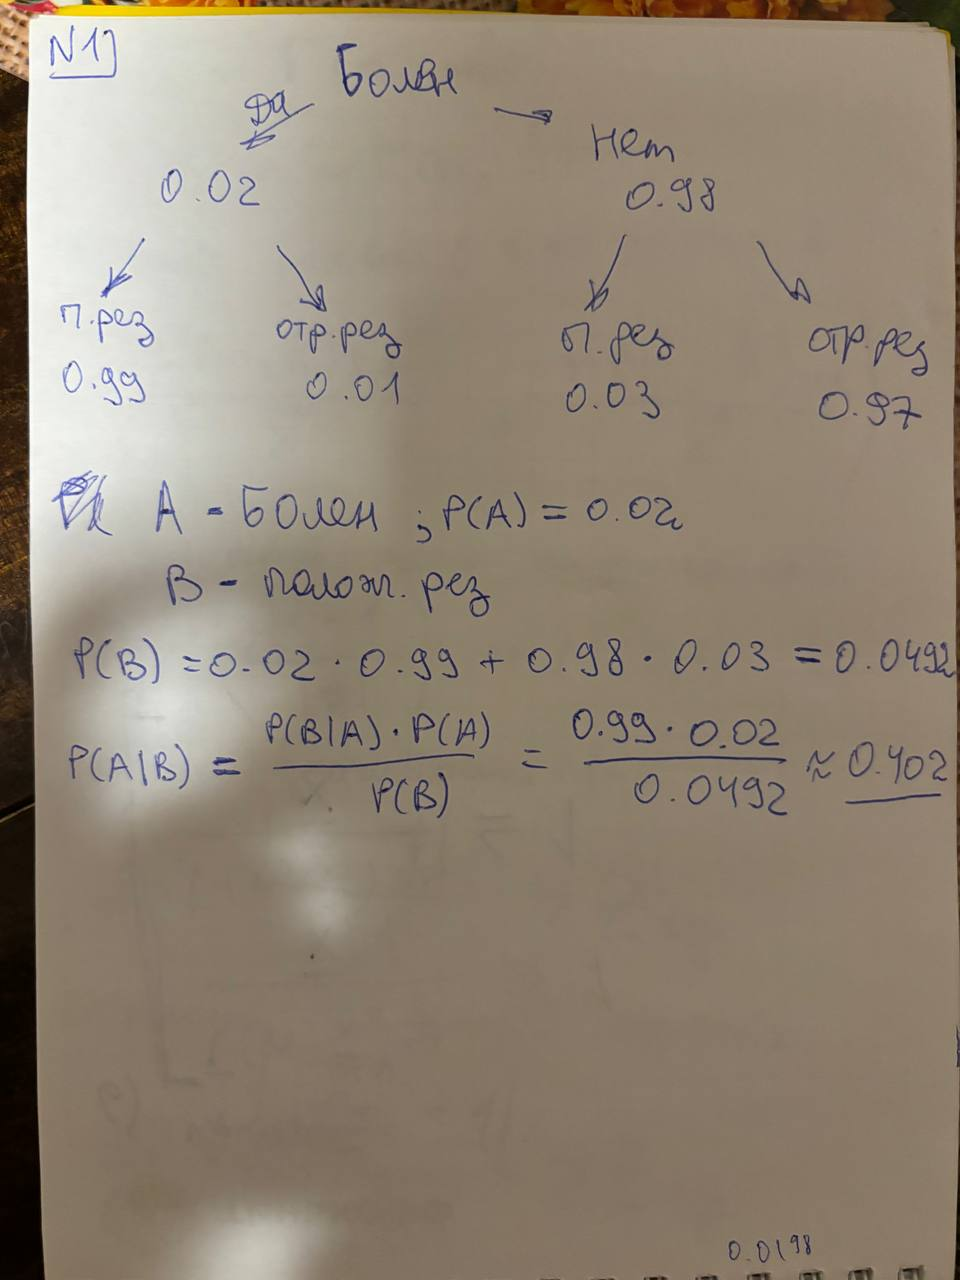

---
### Задача 2. 

Рассмотрим два случая.

**a).** Пусть $X_1, \dots, X_n$ &mdash; выборка из распределения $\mathcal{N}(\theta, 1)$. 

**b).** Пусть $X_1, \dots, X_n$ &mdash; выборка из распределения $\mathcal{N}(0, \theta^{-1})$. 

В каждом случае подберите сопряженное семейство распределений и найдите соответствующее апостериорное распределение параметра $\theta$, а также его математическое ожидание.

Подумайте, какое распределение является сопряженным в случае если неизвестны оба параметра нормального распределения.


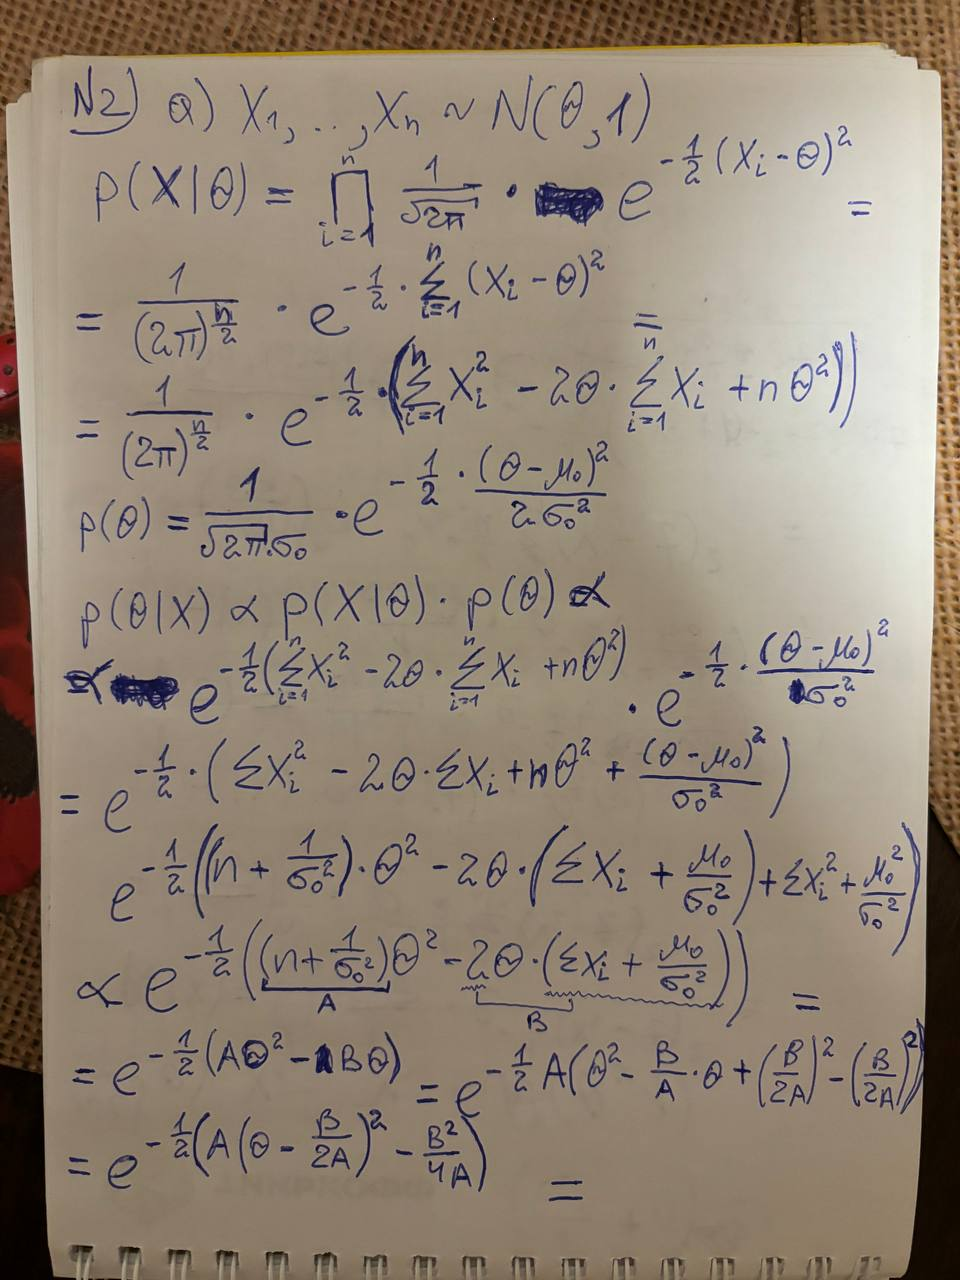! 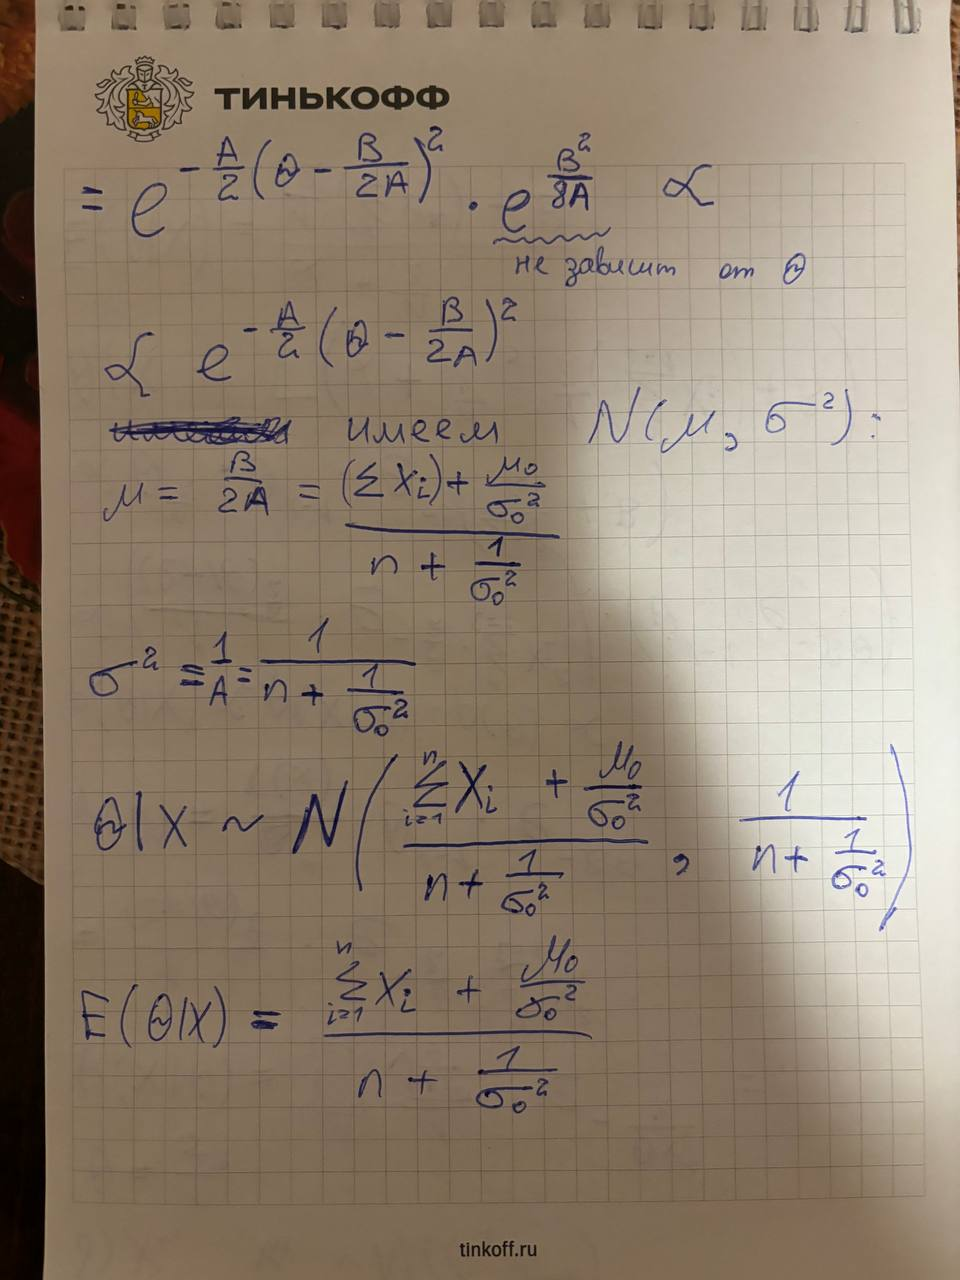 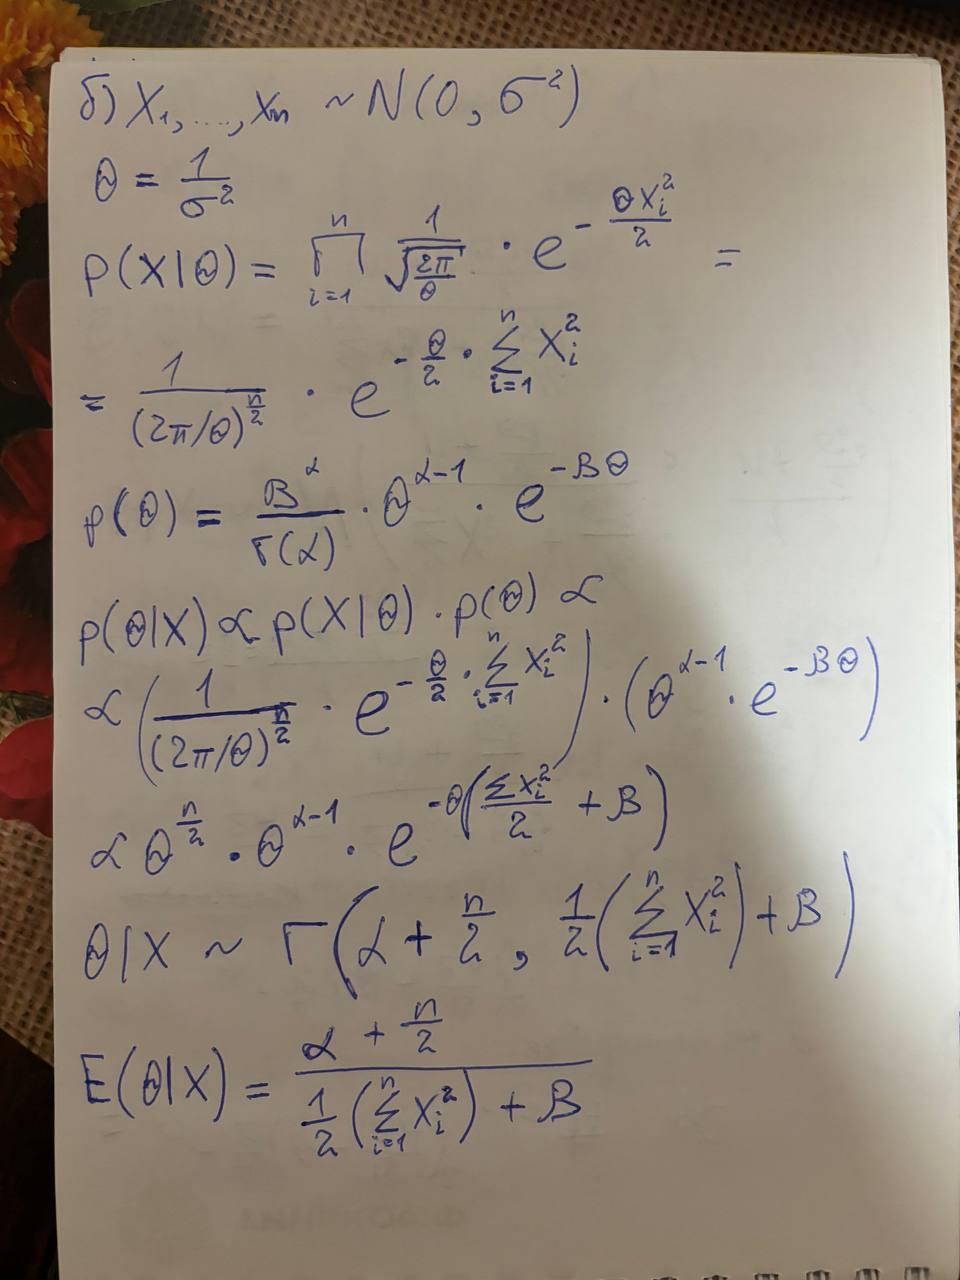

---
### Задача 3.

Рассмотрим столбец Alcalinity of ash датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. Цель &mdash; оценить среднего значения этого признака. 

Для простоты дальнейших вычислений выберите некоторым образом дисперсию данных и считайте ее известной. На практике это не так, и дисперсию можно и нужно оценивать, но мы не хотим сильно усложнять учебную задачу.

In [13]:
import pandas as pd
names = """\
0) Target
1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10)Color intensity
11)Hue
12)OD280/OD315 of diluted wines
13)Proline"""

names = [x.split(")")[1].strip() for x in names.split("\n")]

df = pd.read_csv("./wine.data", header=None)
df.columns = names
df.head()

Target  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

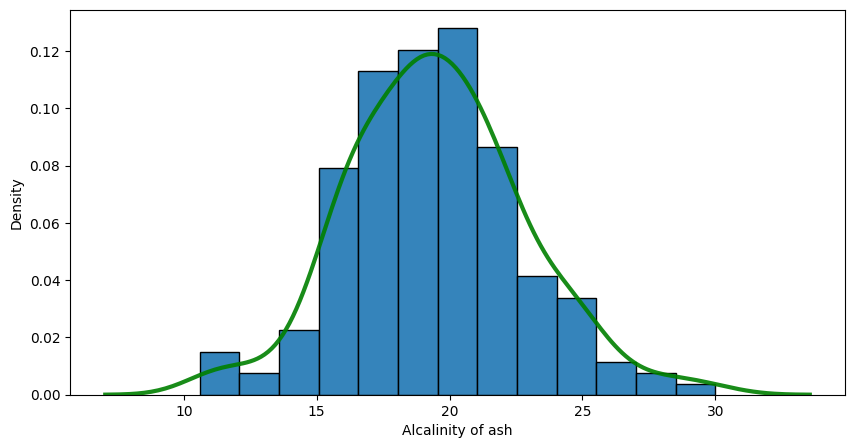

In [15]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(df["Alcalinity of ash"], stat='density', alpha=0.9)
sns.kdeplot(df["Alcalinity of ash"], linewidth=3, color='green', alpha=0.9)
plt.show()

Из класса сопряженных распределений выберите априорное распределение для среднего значения на основе своих представлений, не используя данные. Подсказка: загляните в семинар.

Визуализируйте динамику изменения апостериорного распределения, последовательно добавляя к данным по 20 объектов. Примеры кода можно посмотреть в семинаре.

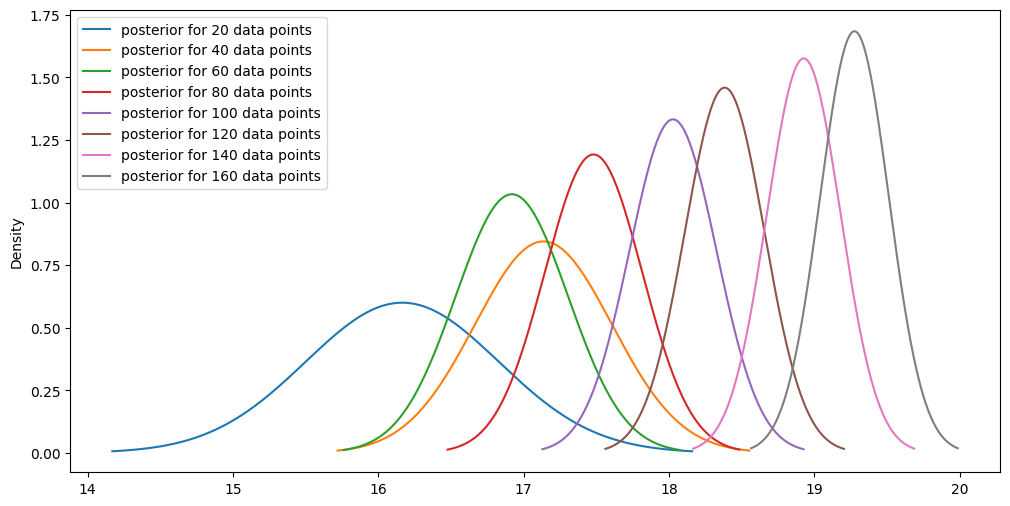

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats


sigma_squared = 9 #дисперсия данных
n_total = len(df["Alcalinity of ash"].values)  # общее количество данных


data = df["Alcalinity of ash"].values

mu_0 = 15  # априорное математическое ожидание
sigma_0_squared = 5*5  # априорная дисперсия


def update_posterior(data, mu_0, sigma_0_squared, sigma_squared):
    n_data = len(data)
    data_sum = np.sum(data)
    
    mu_numerator = mu_0 / sigma_0_squared +  data_sum / sigma_squared
    mu_denominator = 1 / sigma_0_squared + n_data / sigma_squared
    mu_posterior_new = mu_numerator / mu_denominator
    
    sigma_posterior_squared_new = 1 / (1 / sigma_0_squared + n_data / sigma_squared)
    
    return mu_posterior_new, sigma_posterior_squared_new

fig, ax = plt.subplots(figsize=(12, 6))

for i in range(20, n_total + 1, 20):
    data_subset = data[:i]  
    mu_posterior, sigma_posterior_squared = update_posterior(data_subset, mu_0, sigma_0_squared, sigma_squared)
    
    # Апостериорное распределение для mu после добавления данных
    x_values = np.linspace(mu_posterior - 3 * np.sqrt(sigma_posterior_squared), mu_posterior + 3 * np.sqrt(sigma_posterior_squared), 1000)
    y_values = stats.norm.pdf(x_values, mu_posterior, np.sqrt(sigma_posterior_squared))
    
    # Визуализируем
    ax.plot(x_values, y_values, label=f"posterior for {i} data points")

# Настройки графика


ax.set_ylabel("Density")
ax.legend()
plt.show()


**Вывод:**

даже при приблизительном задании дисперсии данных и случайном задании параметров априорного распределения, распределение апостериорное постепенно сходится к правильному

---
### Задача 4.

Некоторая ML-модель имеет один параметр $\theta$, который обучается посредством *минимизации* функции
$$\mathcal{L}(\theta) = \mathsf{E} \exp\left(-\frac{\xi^2\sqrt{\eta}}{1+\theta^2}\right),$$
где $\xi$ имеет стандартное нормальное распределение, а $\eta$ &mdash; пуассоновское распределение с параметром 5 и не зависит от $\eta$.


Оптимизируйте эту функцию, используя стохастический градиентный спуск. Необходимо записать формулу шага и реализовать процедуру оптимизации.

<details>
  <summary>Подсказка</summary>

Посчитайте производную этой функции по $\theta$, поменяв местами интеграл (мат. ожидание) и производную. Далее оцените мат. ожидание по методу Монте-Карло.

</details>

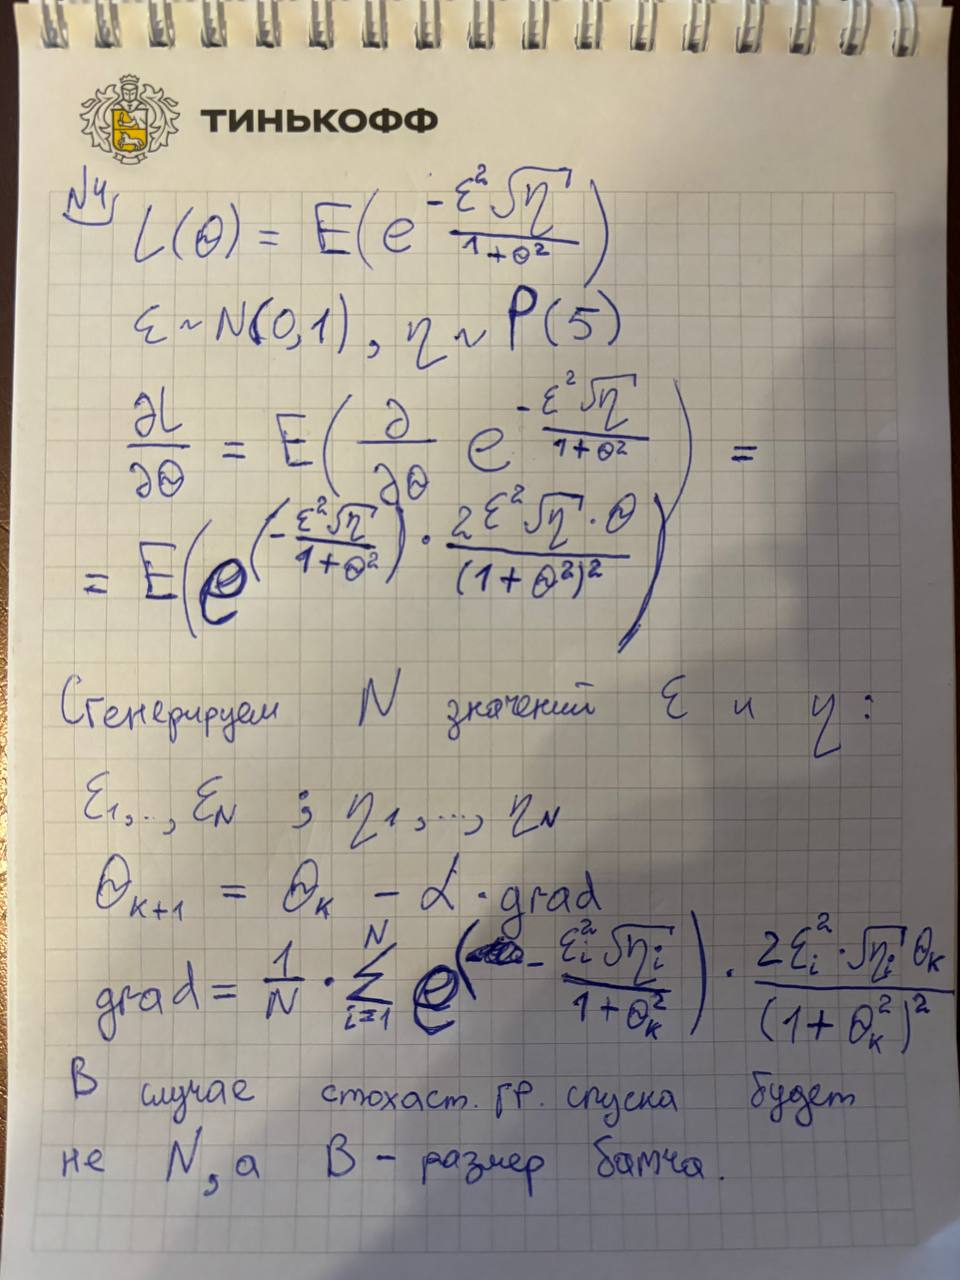

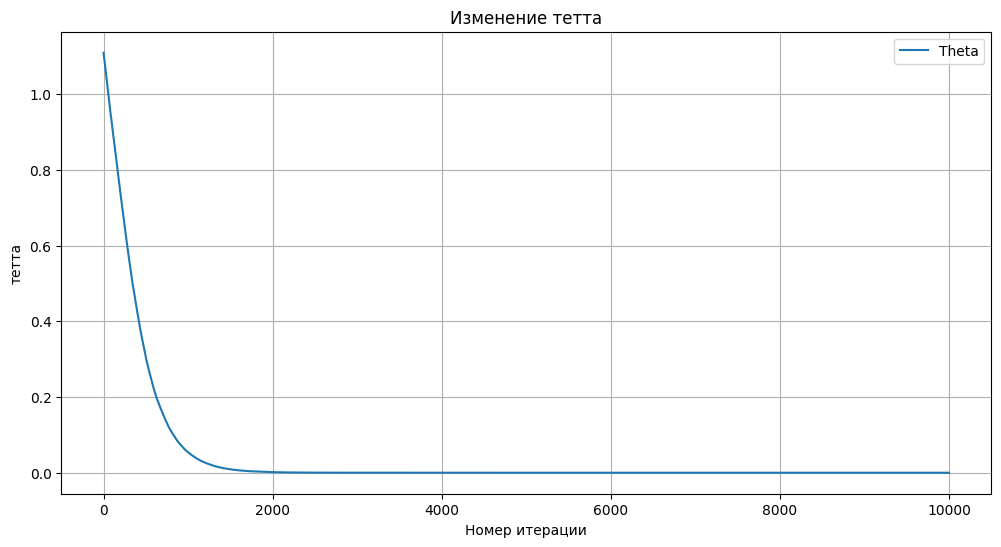

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
alpha = 0.01  # Шаг обучения
num_iter = 10000  # Количество итераций
batch_size = 10  # Размер батча
theta = np.random.normal(0, 1, 1)[0]  


sample_size = 1000  
xi = np.random.normal(0, 1, sample_size)  
eta = np.random.poisson(5, sample_size)   

theta_history = []


for _ in range(num_iter):
    batch_indices = np.random.choice(sample_size, batch_size, replace=True)
    xi_batch = xi[batch_indices]
    eta_batch = eta[batch_indices]

    # Оценка градиента по батчу
    exp_term = np.exp(-xi_batch**2 * np.sqrt(eta_batch) / (1 + theta**2))
    grad_samples = exp_term * (2 * xi_batch**2 * np.sqrt(eta_batch) * theta) / (1 + theta**2)**2
    gradient = np.mean(grad_samples)  # Средний градиент по батчу

    theta -= alpha * gradient

    theta_history.append(theta)


plt.figure(figsize=(12, 6))
plt.plot(range(num_iterations), theta_history, label="Theta")
plt.title("Изменение тетта")
plt.xlabel("Номер итерации")
plt.ylabel("тетта")
plt.grid()
plt.legend()
plt.show()


---
### Задача 5.

> *Не забывайте примеры кода смотреть в семинарских ноутбуках.*

Загрузите данные `flats_moscow.txt` о стоимости квартир в Москве

In [ ]:
data = pd.read_csv('./flats_moscow.txt', sep='\t', index_col=0)
data.head()

Постройте график зависимости цены квартиры (price) от ее общей площади (totsp). Что можно сказать о данных?

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(data['totsp'], data['price'], alpha=0.3)
plt.xlabel('Общая площадь квартиры')
plt.ylabel('Цена квартиры');

Постройте с помощью PyMC линейную регрессию для предсказания цены квартиры (price) от ее общей площади (totsp). Используйте следующие распределения:
* Априорное распределение на коэффициенты &mdash; нормальное с нулевым средним и среднеквадратичным разбросом 20;
* Ошибка имеет нормальное распределение с нулевым средним;
* Априорное распределение на дисперсию ошибки &mdash; модуль распределения Коши.

Запишите модель формулами:

<...>

Реализуйте эту модель и проведите 3000 итераций семплирования

In [ ]:
with pm.Model() as model:
    <...>

Постройте `pm.plot_trace`. Что можно по нему сказать? Какое апострериорное распределение имеют параметры модели?

In [ ]:
<...>

Теперь вам нужно построить предсказательный интервал (ленту) для каждого $x$ по сетке значений totsp, взяв область, в которую попадает 95% вероятностной массы апостериорного распределения. Иначе говоря, на основе построенной модели нужно для каждой площади квартиры $x$ вычислить 95%-й диаппазон цен на квартиры с такой мощностью.

Для выполнения этого пункта задайте сетку значений площади квартиры и с помощью `pm.sample_posterior_predictive` проведите 10000 итераций семплирования из предиктивного распределения.

In [ ]:
<...>

Проверьте размерность полученной матрицы чисел, она должна быть равна $(10000, N)$, где $N$ &mdash; количество значений $x$ в выбранной вами сетке. Тем самым для каждого значения $x$ у вас есть 10000 независимых реализаций цены квартиры с такой площадью. Далее по этим реализациям вы можете посчитать все интересующие вас характеристики.

*Замечание.* На самом деле полученные значения строго не являются независимыми, но мы не будем обращать на это внимание. Если вам будет интересно, можно подробнее почитать про методы MCMC.

In [ ]:
<...>

На основе полученных семплов постройте график предсказательного интервала (ленты). Для этого можно взять квантили у семплов для каждого $x$.

In [ ]:
<...>

Что вы можете сказать по этому графику?

Предложите способ, как исправить модель. Реализуйте эту модель, постройте для нее график предсказательного интервала.

In [ ]:
<...>

Теперь проведем небольшую аналитику. Допустим, мы хотим купить квартиру площадью 75 квадратных метров. Простройте график плотности предсказательного распределения цены такой квартиры. Посчитайте также вероятность того, что квартира площадью 75 квадратных метров имеет цену не более 100.

In [ ]:
<...>

Насколько вообще изменяется цена квартиры при увеличении ее площади на 1 метр? Постройте для этого апостериорное распределение этого параметра, а также посчитайте среднее значение и 95%-й интервал

In [ ]:
<...>